<a href="https://colab.research.google.com/github/yseoyoung/python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 분석에 자주 사용하는 문법 리뷰

벡터

행렬

In [ ]:
import numpy as np
a = np.array([[1,2],[2,3]])
b = np.array([[5],[8]])
ar = np.linalg.inv(a) #a의 riverse 역행렬
answer = ar@b #행렬곱 (내적 dot와는 다름)
answer 

array([[1.],
       [2.]])

통계

In [ ]:
heights = np.random.normal(174,10,size=10000) # 평균이 174를 기준으로 표준 편차가 10인 형태의 데이터 1만개 생성 : 정규분포 함수
import pandas as pd
hs = pd.Series(heights.round()) #올림
hs.value_counts()

177.0    429
175.0    395
173.0    390
170.0    384
174.0    380
        ... 
133.0      1
209.0      1
137.0      1
134.0      1
140.0      1
Length: 74, dtype: int64

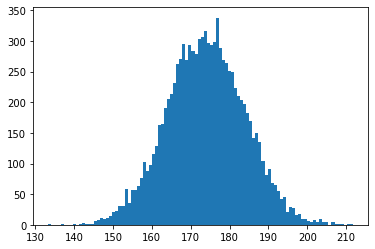

In [ ]:
import matplotlib.pyplot as plt
plt.hist(heights,bins=100)
plt.show()

확률

1~6까지 쓰여진 6면체의 주사위가 있다. (공평하지 않은 주사위)

1이 나올 확률이 1/6

2가 나올 확률이 1/12

3이 나올 확률이 1/12

4가 나올 확률이 1/3

5가 나올 확률이 1/6

6이 나올 확률이 1/6

주사위를 100번 던지는 실험을 해 보세요.

 0~11 사이의 랜덤한 수를 발생시킨다.

 발생한 수가     0,1이면 주사위 1

 발생한 수가       2이면 주사위 2
 
 발생한 수가       3이면 주사위 3
 
 발생한 수가 4,5,6,7이면 주사위 4
 
 발생한 수가     8,9이면 주사위 5
 
 발생한 수가   10,11이면 주사위 6
 

In [ ]:
data = np.random.randint(0,12,1000) # 0~11사이의 랜덤한 수 1000개 발생
cnts = np.zeros(6)
for tv in data:
  if tv==0 or tv==1:
    cnts[0]+=1
  elif tv==2:
    cnts[1]+=1
  elif tv==3:
    cnts[2]+=1
  elif tv>=4 and tv<=7:
    cnts[3]+=1
  elif tv==8 or tv==9:
    cnts[4]+=1
  else:
    cnts[5]+=1
cnts

array([173.,  87.,  95., 332., 168., 145.])

#가설과 추론

현재는 2029년 Covid 이후에 전 세계에 새로운 전염병이 창궐하였다.

그 이름도 무서운 eh

초기 감염률 0.001

sesac_medical에서 테스터를 개발하여 발표하였는데

양성인지 음성인지 판별하였을 때 정확도가 99%라고 한다.

해당 테스터는 유의미한 테스터인지 판별하시오.

거짓 양성(false positive) 또는 1종 오류(type I error)는 통계상 실제로는 음성인데 검사 결과는 양성이라고 나오는 것이다. 예를 들어, 어떤 메일이 스팸 메일인지 검사하는 프로그램이 있다고 하자. 이때 어떤 메일이 실제로는 스팸 메일이 아니지만 프로그램 검사 결과 스팸 메일이라고 판정한다면, 이것이 거짓 양성이다. 위양성(僞陽性), 혹은 거짓 경보(false alarm)라고도 한다.

실제로 검사 알고리즘을 개발한다면, 거짓 양성과 거짓 음성 사이에 trade-off(어느 한편을 늘리면 다른 한편은 그 만큼 줄어드는 것)가 필연적으로 생기게 된다.

#선형 회귀 Linear Regression


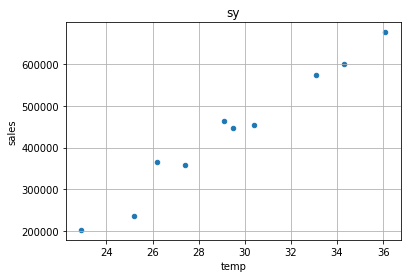

In [ ]:
#온도가 아이스크림에 미치는 ...
temperature = [25.2,27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.3,29.1]
sales = [236500,357500,203500,365200,446600,574200,453200,675400,598400,463100]
dict_data = {"temp":temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data,columns=["temp","sales"])
df_sales.plot.scatter(x='temp',y='sales',grid=True,title="sy")
plt.show()

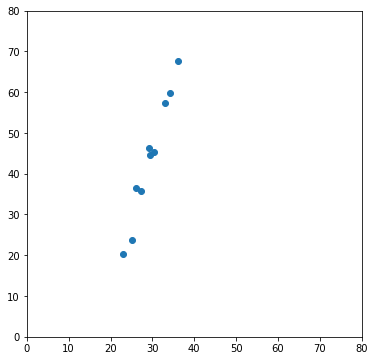

In [ ]:
#직선의 방정식으로
sales2 = np.array(sales)/10000
dict_data2 = {"temp":temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2,columns=["temp","sales2"])
plt.figure(figsize=(6,6))
plt.plot(temperature,sales2,'o')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

y = ax + b

머신러닝에서 표현하는 방식
: y = wx + b 

w : 가중치 - 독립변수 x가 종속 변수 y에 영향을 주는 정도

b : 편향 - 주어진 인자 외에 결과 y에 영향을 주는 정도

y = 3x - 5 (eh)

y = 4x - 2 (sy)

y = 5x - 3 (mn)

y = 4x - 5 (hj)

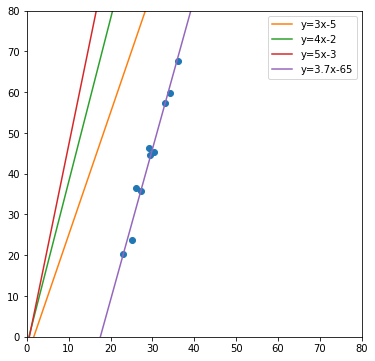

In [ ]:
#손실 함수 (loss function) : 해당하는 선과 점 사이의 오차가 얼마인지 계산하는 함수
#가장 많이 사용 하는 것 : 점과 선 사이의 절댓값을 취하여 평균 내기
#오차를 극대화 시키기 위해 점과 선 사이를 제곱을 취하여 합산한 값을 평균 내기 : 평균제곱오차
sales2 = np.array(sales)/10000
dict_data2 = {"temp":temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2,columns=["temp","sales2"])
plt.figure(figsize=(6,6))
plt.plot(temperature,sales2,'o')
plt.plot([0,80],[3*0-5, 3*80-5],'-',label='y=3x-5')
plt.plot([0,80],[4*0-2, 4*80-2],'-',label='y=4x-2')
plt.plot([0,80],[5*0-3, 5*80-3],'-',label='y=5x-3')
#plt.plot([0,80],[4*0-5, 4*80-5])
plt.plot([0,80],[3.7*0-65, 3.7*80-65],'-',label='y=3.7x-65')
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.show()

#손실 함수 Cost Function or Loss Function

예측값과 실제값에 대한 오차를 줄이는 데에 유용하게 사용

**회귀 모델**에 쓰이는 손실함수 :  **MSE, MAE, RMES** 

**분류 모델**에 쓰이는 손실함수 : Binary cross-entropy, Categorical cross-entropy

## MSE(Mean Square Error)

장점:


```
- 실제 정답에 대한 정답률의 오차뿐만 아니라 다른 오답에 대한 정답률의 오차도 포함하여 계산해준다.
- MAE와 달리 최적값에 가까워질수록 이동값이 다르게 변화하기 때문에 최적값에 수렴하기 용이하다.
```

단점:


```
- 값을 제곱하기 때문에 절댓값이 1미만인 값은 더 작아지고, 1보다 큰 값은 더 커지는 왜곡이 발생할 수 있다.
- 제곱하기 때문에 특이값의 영향을 많이 받는다.
```





In [ ]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
for i,temp in enumerate(temperature):
  yp1 = 3*temp - 5 #예측값
  yp2 = 4*temp - 2 #예측값
  yp3 = 5*temp - 3 #예측값
  yp4 = 3.7*temp - 65 #예측값
  y = sales2[i]
  es1 += abs(yp1-y)**2
  es2 += abs(yp2-y)**2
  es3 += abs(yp3-y)**2
  es4 += abs(yp4-y)**2
print(f"{es1:09.2f}\n{es2:09.2f}\n{es3:09.2f}\n{es4:09.2f}")

015739.03
051850.94
101110.49
000066.35


# 로지스틱 회귀 logistic regression

회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.

`스팸 메일 분류기 같은 예시를 생각하면 쉽다. 어떤 메일을 받았을 때 그것이 스팸일 확률이 0.5 이상이면 spam으로 분류하고, 확률이 0.5보다 작은 경우 ham으로 분류하는 거다. 이렇게 데이터가 2개의 범주 중 하나에 속하도록 결정하는 것을 2진 분류(binary classification)라고 한다.`

In [ ]:
import math
def sigmoid(x): #Logistic Function or Sigmoid Function
  return math.exp(x)/(1+math.exp(x))

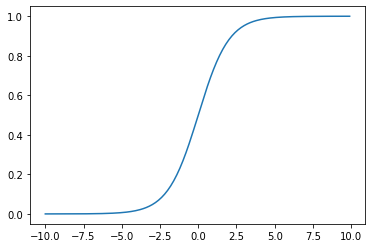

In [ ]:
xs = [i/10 for i in range(-100,100,1)]
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys)
plt.show()

#KNN (K-Nearest Neighbor)

k : 개수

어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식입니다. 

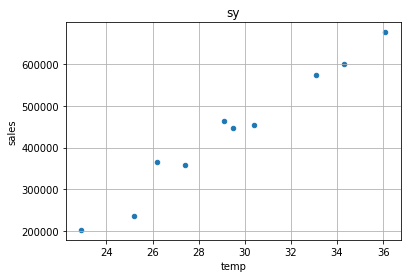

In [ ]:
temperature = [25.2,27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.3,29.1]
sales = [236500,357500,203500,365200,446600,574200,453200,675400,598400,463100]
dict_data = {"temp":temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data,columns=["temp","sales"])
df_sales.plot.scatter(x='temp',y='sales',grid=True,title="sy")
plt.show()

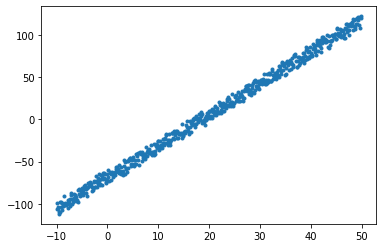

In [ ]:
temps = np.array([temp/10 for temp in range(-100,500,1)])
sales = [3.7*temp-65+np.random.randint(np.random.randint(-12,-7),np.random.randint(3,8)) for temp in temps]
plt.plot(temps,sales,'.')
plt.show()

In [ ]:
temp = 25
neighbors = [24.8,24.9,25,25.1,25.2]
n_sales = np.zeros(5)
for j,neighbor in enumerate(neighbors): #실제 판매가가 얼마인지
  for i,stemp in enumerate(temps):
    if neighbor == stemp:
      n_sales[j] = sales[i]
n_sales.mean()

22.1

In [ ]:
heights = np.random.normal(174,10,size=10000) #평균이 174, 표준편차가 10에 해당하는 정규 분포 데이터 10000개를 만들어 줴숑.
heights.mean(),heights.std() #mean() 평균 std() 표준편차

(174.09885076141202, 10.060631273889397)

In [ ]:
heights2 = heights-heights.mean()
heights2.mean(), heights2.std() #

(9.035261427925434e-15, 10.060631273889397)

In [ ]:
#리스케일링 ?
heights3 = heights2/heights2.std()
heights3.mean(),heights3.std() 

(8.93862761586206e-16, 1.0)

#KMeans

#의사결정트리

#퍼셉트론

학습이 가능한 초창기 신경망 모델

초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘


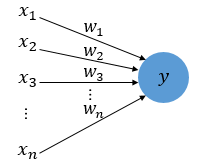


```
x는 입력값을 의미하며, w는 가중치(Weight), y는 출력값입니다. 그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다. 각각의 인공 뉴런에서 보내진 입력값 는 각각의 가중치 와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다. 이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.
```



#TFIDF